---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

Segundo semestre del 2021

---
[comment]: <> (Modificar esta sección con datos personales)

* Estudiante 1: **Sara Alvarado Pla - B80354**
* Estudiante 2: **Limber Benavides Araya - B81061**  
* Grupo: **1 y 2**

# `L4` - *Procesos aleatorios*
---



---
## L4.1 - Código base


El archivo L4_base.py tiene un código para visualizar la solución del problema 2 de la práctica E13 (disponible en la página del tema 13 - Procesos aleatorios).

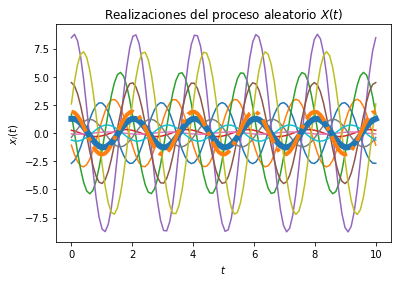

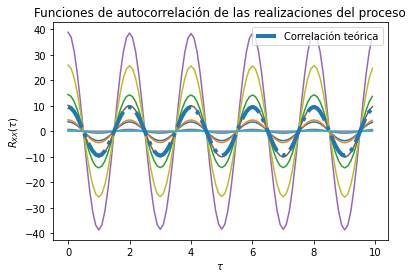

In [2]:
# Base para la solución del Laboratorio 4

# Los parámetros T, t_final y N son elegidos arbitrariamente

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Variables aleatorias A y Z
vaA = stats.norm(3, np.sqrt(10))
vaZ = stats.uniform(-np.pi/2, np.pi)

# Creación del vector de tiempo
T = 100    # número de elementos
t_final = 10     # tiempo en segundos
t = np.linspace(0, t_final, T)

# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 10
X_t = np.empty((N, len(t))) # N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (A y Z independientes)
for i in range(N):
    A = vaA.rvs()
    Z = vaZ.rvs()
    x_t = A * np.cos(np.pi*t + Z)
    X_t[i,:] = x_t
    plt.plot(t, x_t)

# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Graficar el resultado teórico del valor esperado
E = 6/np.pi * np.cos(np.pi*t)
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
    for i, tau in enumerate(desplazamiento):
        corr[n, i] = np.correlate(X_t[n,:], np.roll(X_t[n,:], tau))/T
    plt.plot(taus, corr[n,:])

# Valor teórico de correlación
Rxx = 19/2 * np.cos(np.pi*taus)

# Gráficas de correlación para cada realización y la
plt.plot(taus, Rxx, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show()

---
## L4.1 - Solución problema 4


El siguiente código para visualizar la solución del problema 4 de la práctica E13 (disponible en la página del tema 13 - Procesos aleatorios).

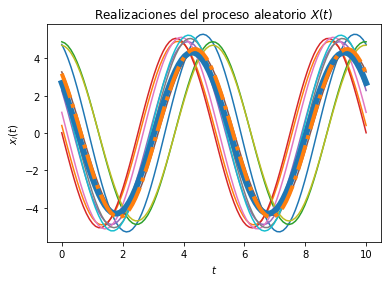

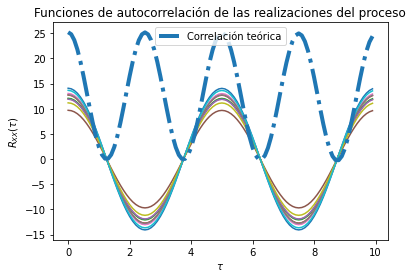

In [3]:
# Base para la solución del Laboratorio 4

# Los parámetros T, t_final y N son elegidos arbitrariamente

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



# Variables aleatorias A y Z
vaC = stats.norm(5, np.sqrt(0.2)) #Valores de C
vaZ = stats.uniform(0, np.pi/2) #Valores de theta

'''Como se necesita una constante para omega,
lo mejor es sacar el promedio entre los valores 
que nos están dando en el ejercicio.'''
omega = [2*np.pi*(59.1), 2*np.pi*(60.1)]
vaB = np.mean(omega) 


# Creación del vector de tiempo
T = 100    # número de elementos
t_final = 10     # tiempo en segundos
t = np.linspace(0, t_final, T)

'''Solución de la parte a'''
# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 10
X_t = np.empty((N, len(t))) # N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (A y Z independientes)
for i in range(N):
    C = vaC.rvs()
    Z = vaZ.rvs()
    x_t = C * np.cos(vaB*t + Z)
    X_t[i,:] = x_t
    plt.plot(t, x_t)
# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Graficar el resultado teórico del valor esperado
E = 10/np.pi* (np.cos(vaB*t)-np.sin(vaB*t))
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()

'''Solución de la parte b'''

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
    for i, tau in enumerate(desplazamiento):
        corr[n, i] = np.correlate(X_t[n,:], np.roll(X_t[n,:], tau))/T
    plt.plot(taus, corr[n,:])

# Valor teórico de correlación, se toma el valor de teta como 0 
#ya que se encuentra en el rango aceptado
Rxx = 25.2 *np.cos(vaB*t+0)*np.cos(vaB*(t+taus)+0)


# Gráficas de correlación para cada realización y la
plt.plot(taus, Rxx, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show()